In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
df = pd.read_csv('C:/Users/Admin/Desktop/Tema-Master/ddos_and_mitc_attack.csv')

# Define the features and labels
X = df[['timestamp', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'flags']]
y = df['label']

# One-hot encode the IP addresses
ip_encoder = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ip_transformer = ColumnTransformer([('one_hot', ip_encoder, ['src_ip', 'dst_ip', 'flags'])], remainder='passthrough')
X = ip_transformer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Tune the hyperparameters of the decision tree model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)
print("Best parameters:", grid_search.best_params_)
model = grid_search.best_estimator_

# Make a prediction
prediction = model.predict(X)
print("Prediction:", prediction)
accuracy = accuracy_score(y, prediction)
print("Accuracy:", accuracy)

# Calculate the percentage of malicious packets
total_packets = len(prediction)
malicious_packets = sum(prediction == 'malicious')
percentage = malicious_packets / total_packets * 100
print(f"Percentage of malicious packets in 20 minutes: {percentage:.2f}%")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Prediction: ['normal' 'normal' 'normal' ... 'normal' 'normal' 'normal']
Accuracy: 1.0
Percentage of malicious packets in 20 minutes: 4.29%


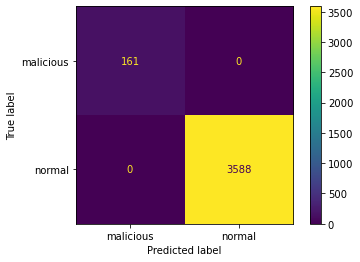

 Accuracy : 1.0 
 Precision : 1.0 
 Recall : 1.0


In [2]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

confusion_matrix(y, prediction)
plot_confusion_matrix(model, X, y)  
plt.show()
accuracy=accuracy_score(y, prediction)
precision=precision_score(y, prediction, average="binary", pos_label="malicious")
recall=recall_score(y, prediction, average="binary", pos_label="malicious")
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))